**ANALYZING INDIAN STARTUP FUNDING TRENDS (2018-2021) WITH CRISP-DM**

**Description:**

This project conducts an in-depth analysis of funding trends within the Indian startup ecosystem from 2018 to 2021, employing the CRISP-DM methodology. Leveraging comprehensive datasets on funding details, our goal is to identify patterns, fluctuations, and key insights into the funding landscape of Indian startups during this period. By examining funding amounts, types, sectors, and geographical distributions, we aim to provide actionable recommendations for stakeholders navigating the dynamic funding environment.

**Hypothesis**

**Null Hypothesis (H₀)**

The funding landscape of Indian startups from 2018 to 2021 is not significantly influenced by economic conditions, industry sector performance, and Location.

**Alternative Hypothesis (H₁)**

The funding landscape of Indian startups from 2018 to 2021 is significantly influenced by economic conditions, industry sector performance, and Location.

**Primary Business Question:**

How have funding trends evolved in the Indian startup ecosystem from 2018 to 2021, and what insights can be derived to inform investment decisions, policy-making, and strategic planning for stakeholders?

**Sub-Questions:**

1. **Yearly Funding Trends:**

How did the total funding amounts received by startups change each year from 2018 to 2021?

Were there any significant peaks or troughs in funding during this period, and what external factors (e.g., economic conditions, policy changes) might have influenced these trends?

2. **Sector-Specific Funding Analysis:**

Which sectors (e.g., technology, healthcare, fintech) received the most funding, and how did this distribution change over the four years?

What characteristics make certain sectors more attractive to investors, and how have sector-specific trends impacted the overall funding landscape?

3. **Funding Stages and Evolution:**

What were the most common funding stages (e.g., seed, Series A, Series B) for Indian startups during this period?

How did the prevalence of different funding stages shift over time, and what does this indicate about the maturity and development of the Indian startup ecosystem?

4. **Geographical Distribution of Funding:**

How was funding distributed across various regions in India, and which regions emerged as major startup hubs from 2018 to 2021?

What factors contributed to the rise of these startup hubs, and how did regional policies or infrastructure developments influence funding patterns?

5. **Impact of External Factors:**

How did global economic trends, such as market fluctuations and international trade relations, affect funding trends in the Indian startup ecosystem?

In what ways did government policies, incentives, and regulatory changes impact the funding landscape?

How did advancements in technology and shifts in consumer behavior influence investor interest and funding decisions?

6. **Investor Behavior and Preferences:**

Who were the most active investors in the Indian startup ecosystem during this period, and what were their investment strategies?

How did investor preferences evolve concerning sectors, funding stages, and geographic locations?

7. **Success Metrics and Funding Outcomes:**

What correlation exists between the amount of funding received and the success metrics of startups (e.g., revenue growth, market expansion)?



**CRISP-DM Strategy (One-Month Timeline)**

**Week 1: Business Understanding & Data Understanding**
**Objective:** Define project objectives, gather requirements, and understand the provided datasets.

**Tasks:**
1. Conduct meetings with team members to clarify project goals and expectations.
2. Perform initial exploration of the datasets to understand their structure and content.
3. Identify key variables and metrics of interest for analysis.

**Week 2: Data Preparation and Cleaning**
**Objective:** Clean and preprocess the datasets to ensure they are ready for analysis.

**Tasks:**
1. Address missing values, remove duplicates, and handle inconsistencies in the data.
2. Conduct exploratory data analysis (EDA) to uncover patterns and trends.

**Week 3: Modeling & Evaluation**
**Objective:** Build models and evaluate their performance to derive insights.

**Tasks:**
1. Build predictive models to analyze startup success factors or funding outcomes.
2. Evaluate model performance using appropriate metrics and validation techniques.

**Week 4: Deployment**
**Objective:** Present findings and provide actionable recommendations to stakeholders.

**Tasks:**
1. Create visualizations and reports to communicate insights effectively.
2. Summarize key findings and implications for decision-making.
3. Present actionable recommendations based on the analysis.
4. Document the entire process, including methodologies, findings, and recommendations (Article).

## Business Understanding & Data Understanding

**Datasets Importation**

In [1]:
# Connect to the Database Using "pyodbc"
import pyodbc
print("pyodbc is installed and imported successfully")

import pyodbc
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
login = environment_variables.get("LOGIN")
password = environment_variables.get("PASSWORD")





pyodbc is installed and imported successfully


In [2]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [3]:
# connect to the Database
connection = pyodbc.connect(connection_string)
print("Connection successful")


Connection successful


In [4]:
# Query the Sql Database
query = "SELECT * FROM dbo.LP1_startup_funding2020"

# Execute the query and read the results into a DataFrame
data_1 = pd.read_sql(query, connection)


In [5]:
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data_2 = pd.read_sql(query, connection)

In [6]:
# Load the CSV file into  DataFrame


df_data_3 = pd.read_csv('../CSV Files/startup_funding2018.csv')

df_data_4 = pd.read_csv('../CSV Files/startup_funding2019.csv')

**Initial Exploration**

In [7]:
# Inspect columns of each DataFrame
print("Columns in data_1:", data_1.columns)
print("Columns in data_2:", data_2.columns)
print("Columns in df_data_3:", df_data_3.columns)
print("Columns in df_data_4:", df_data_4.columns)


Columns in data_1: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')
Columns in data_2: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')
Columns in df_data_3: Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')
Columns in df_data_4: Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


In [8]:
# Define a function to convert rupees to dollars
def rupees_to_dollars(amount, currency):
    if currency.lower() == 'rupees':
        return amount * 0.014  # Conversion rate from rupees to dollars
    else:
        return amount

In [9]:
# Standardize column names
df_data_3 = df_data_3.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does'
})

df_data_4 = df_data_4.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
})

In [10]:
# Ensure all DataFrames have the same columns
common_columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage', 'column10']


**Merging the Four (4) DataFrames into a Single DataFrame**

In [11]:

# Check if 'column10' is present in data_1 and data_2
if 'column10' not in data_1.columns:
    data_1['column10'] = pd.NA
if 'column10' not in data_2.columns:
    data_2['column10'] = pd.NA

# Add missing columns to df_data_3
for column in common_columns:
    if column not in df_data_3.columns:
        df_data_3[column] = pd.NA

# Add missing columns to df_data_4
for column in common_columns:
    if column not in df_data_4.columns:
        df_data_4[column] = pd.NA

# Align columns in each DataFrame
data_1 = data_1[common_columns]
data_2 = data_2[common_columns]
df_data_3 = df_data_3[common_columns]
df_data_4 = df_data_4[common_columns]

# Apply the conversion function to the 'Amount' column in all DataFrames
data_1['Amount'] = data_1.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
data_2['Amount'] = data_2.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
df_data_3['Amount'] = df_data_3.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
df_data_4['Amount'] = df_data_4.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)



# Concatenate the DataFrames
merged_data = pd.concat([data_1, data_2, df_data_3, df_data_4], ignore_index=True)




**Initial Exploration**


In [12]:
# Display the first few rows of the combined DataFrame
print("First 5 rows of the merged dataset:")

merged_data.head()


First 5 rows of the merged dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [13]:
# Display the structure of the combined DataFrame
print("\nStructure of the merged dataset:")
merged_data.info()


Structure of the merged dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
dtypes: float64(1), object(9)
memory usage: 225.0+ KB


In [14]:
# Display the summary statistics for the 'Amount' column
print("\nSummary statistics for the 'Amount' column:")

merged_data['Amount'].describe()



Summary statistics for the 'Amount' column:


count     2622
unique     774
top          —
freq       148
Name: Amount, dtype: object

In [15]:

# Check for missing values
print("\nMissing values in each column:")

merged_data.isnull().sum()


Missing values in each column:


Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount            257
Stage             938
column10         2877
dtype: int64

In [16]:
# Display the number of unique values in each column
print("\nNumber of unique values in each column:")

print(merged_data.nunique())


Number of unique values in each column:
Company_Brand    2214
Founded            34
HeadQuarter       172
Sector            873
What_it_does     2691
Founders         1980
Investor         1777
Amount            774
Stage              75
column10            2
dtype: int64


In [17]:
# Convert 'Amount' column to numeric dtype, coercing errors to NaN
merged_data['Amount'] = pd.to_numeric(merged_data['Amount'], errors='coerce')

# Display the summary statistics for the 'Amount' column
print("\nSummary statistics for the 'Amount' column after conversion:")

merged_data['Amount'].describe()



Summary statistics for the 'Amount' column after conversion:


count    9.760000e+02
mean     9.496123e+07
std      2.243790e+09
min      7.500000e+03
25%      9.796475e+05
50%      2.800000e+06
75%      1.000000e+07
max      7.000000e+10
Name: Amount, dtype: float64

**Key Variables and Metrics of Interest for Analysis**


**1. Yearly Funding Trends:**

Amount: Total funding amounts received by startups each year.

Year: Yearly trend analysis.

**2. Sector-Specific Funding Analysis:**

Amount: Funding amounts received by startups in different sectors.

Sector: Sector classification of startups.

Year: Yearly trend analysis.

**3. Funding Stages and Evolution:**

Stage: Funding stage of startups (e.g., seed, Series A, Series B).

Year: Yearly trend analysis.

**4. Geographical Distribution of Funding:**

Amount: Funding amounts received by startups in different regions.

Headquarter Location: Geographical location of startups.

Year: Yearly trend analysis.


**5. Investor Behavior and Preferences:**

Investor: Identity and characteristics of investors.

Amount: Investment amounts by investors.

Sector: Preferred sectors of investors.

Stage: Preferred funding stages of investors.

Year: Yearly trend analysis.

**6. Success Metrics and Funding Outcomes:**

Success metrics: Revenue growth, market expansion, profitability.

Amount: Correlation between funding amounts and success metrics.

Year: Yearly trend analysis.

## Data Preparation and Cleaning

**Addressing Missing Values, Removing Duplicates, and Handling Inconsistencies in the Data**

In [18]:
#Step 1: Identify missing values

missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount           1903
Stage             938
column10         2877
dtype: int64


In [19]:
#Step 2: Standardize Formats

# To ensure that 'Founded' is treated as numeric, and 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage' are strings.

merged_data['Founded'] = pd.to_numeric(merged_data['Founded'], errors='coerce')
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].astype(str).str.title()  
merged_data['Sector'] = merged_data['Sector'].astype(str).str.title()
merged_data['What_it_does'] = merged_data['What_it_does'].astype(str).str.title()
merged_data['Founders'] = merged_data['Founders'].astype(str).str.title()
merged_data['Investor'] = merged_data['Investor'].astype(str).str.title()
merged_data['Stage'] = merged_data['Stage'].astype(str).str.title()

In [20]:
# Step 3: Handle missing values
merged_data['Founded'].fillna(merged_data['Founded'].median(), inplace=True)
merged_data['HeadQuarter'].fillna(merged_data['HeadQuarter'].mode()[0], inplace=True)
merged_data['Sector'].fillna(merged_data['Sector'].mode()[0], inplace=True)
merged_data['Founders'].fillna('Unknown', inplace=True)  
merged_data['Investor'].fillna('Unknown', inplace=True)  
merged_data['Amount'].fillna(merged_data['Amount'].median(), inplace=True)  
merged_data['Stage'].fillna(merged_data['Stage'].mode()[0], inplace=True)


In [21]:
# Step 4: Remove duplicates
merged_data.drop_duplicates(inplace=True)


In [22]:
# Step 5: Handle inconsistencies
merged_data['Company_Brand'] = merged_data['Company_Brand'].str.lower()

In [23]:
# Step 6: Remove 'column10' column
merged_data.drop(columns=['column10'], inplace=True)

In [24]:
# Ensure 'Founded' column is integer after filling missing values
merged_data['Founded'] = merged_data['Founded'].astype(int)

# Display the cleaned dataset
print("Cleaned Dataset:")

merged_data.head()

Cleaned Dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019,Chennai,Agritech,Cultivating Ideas For Profit,"Prasanna Manogaran, Bharani C L",Angel Investors,200000.0,None
1,krayonnz,2019,Bangalore,Edtech,An Academy-Guardian-Scholar Centric Ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",Gsf Accelerator,100000.0,Pre-Seed
2,padcare labs,2018,Pune,Hygiene Management,Converting Bio-Hazardous Waste To Harmless Waste,Ajinkya Dhariya,Venture Center,2800000.0,Pre-Seed
3,ncome,2020,New Delhi,Escrow,Escrow-As-A-Service Platform,Ritesh Tiwari,"Venture Catalysts, Pointone Capital",400000.0,None
4,gramophone,2016,Indore,Agritech,Gramophone Is An Agtech Platform Enabling Acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


In [25]:
merged_data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 2853 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2853 non-null   object 
 1   Founded        2853 non-null   int32  
 2   HeadQuarter    2853 non-null   object 
 3   Sector         2853 non-null   object 
 4   What_it_does   2853 non-null   object 
 5   Founders       2853 non-null   object 
 6   Investor       2853 non-null   object 
 7   Amount         2853 non-null   float64
 8   Stage          2853 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 211.7+ KB


In [26]:
# Verify that the cleaned dataset has no missing values

missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [27]:
# Checking for duplicates

duplicates = merged_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [28]:
# Checking Data Types

data_types = merged_data.dtypes
print("Data types of each column:\n", data_types)


Data types of each column:
 Company_Brand     object
Founded            int32
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object


In [29]:
#Summary Statistics


summary_statistics = merged_data.describe(include='all')
print("Summary statistics for the dataset:")
summary_statistics

# summary_statistics = merged_data.describe(include='all')
# print("Summary statistics for the dataset:\n", summary_statistics)

Summary statistics for the dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,2853,2853.000000,2853,2853,2853,2853,2853,2.853000e+03,2853
unique,2152,NaN,173,837,2690,1980,1759,NaN,71
top,bharatpe,NaN,Bangalore,Fintech,Provides Online Learning Classes,Nan,Nan,NaN,None
freq,9,NaN,756,256,5,528,525,NaN,881
mean,NaN,2016.318612,NaN,NaN,NaN,NaN,NaN,3.415538e+07,NaN
std,NaN,3.757992,NaN,NaN,NaN,NaN,NaN,1.312627e+09,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,7.500000e+03,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,2.800000e+06,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,2.800000e+06,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,2.800000e+06,NaN


**Exploratory Data Analysis (EDA)**

**Import Necessary Libraries**

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualisation style
sns.set(style="whitegrid")

# Display settings for larger outputs
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)


**Descriptive Statistics**

In [31]:


# Frequency distribution for categorical columns
merged_data['Company_Brand'].value_counts()
merged_data['HeadQuarter'].value_counts()
merged_data['Sector'].value_counts()
merged_data['What_it_does'].value_counts()
merged_data['Founders'].value_counts()
merged_data['Investor'].value_counts()
merged_data['Stage'].value_counts()

# Summary statistics for numerical columns
merged_data.describe()


,Founded,Amount
count,2853.000000,2.853000e+03
mean,2016.318612,3.415538e+07
std,3.757992,1.312627e+09
min,1963.000000,7.500000e+03
25%,2015.000000,2.800000e+06
50%,2017.000000,2.800000e+06
75%,2018.000000,2.800000e+06
max,2021.000000,7.000000e+10


**Visualize the Distribution of the "Founded" Column**

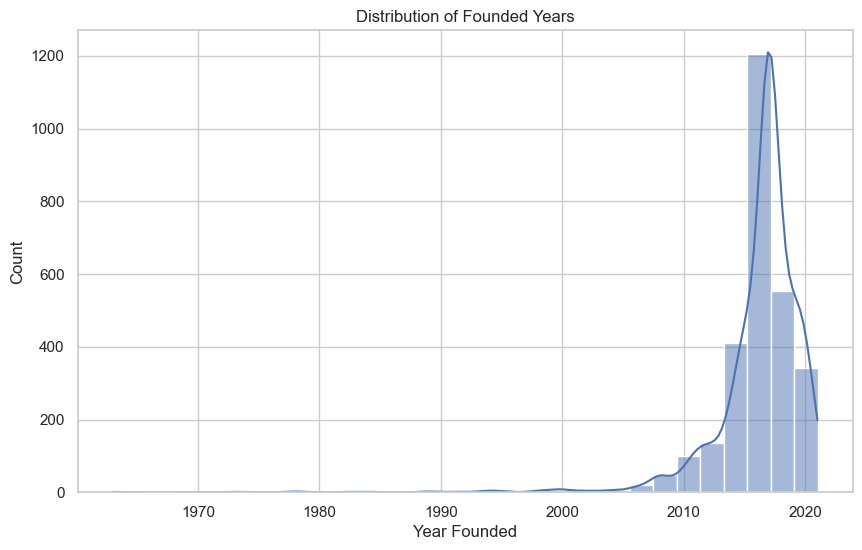

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Founded'], bins=30, kde=True)
plt.title('Distribution of Founded Years')
plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.show()


**Visualize the Distribution of the "Amount" Column**

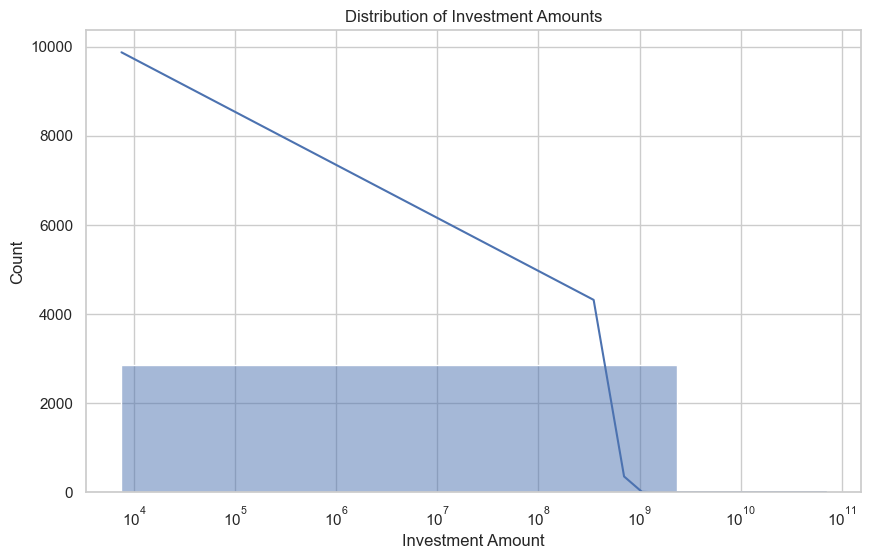

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Amount'], bins=30, kde=True)
plt.title('Distribution of Investment Amounts')
plt.xlabel('Investment Amount')
plt.ylabel('Count')
plt.xscale('log')  # Log scale for better visualization
plt.show()


**Bar plots for Categorical Columns**

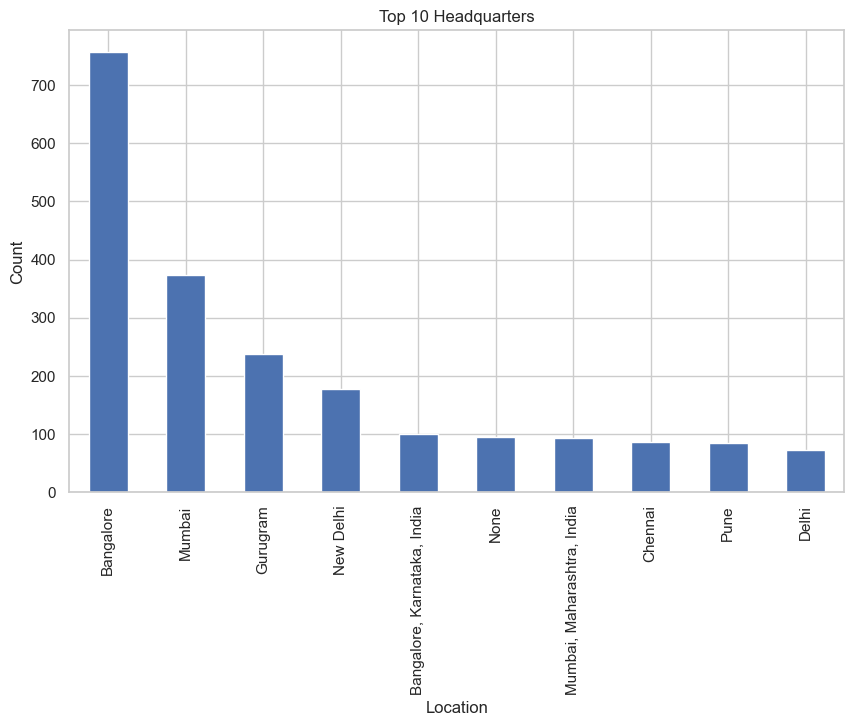

In [34]:
plt.figure(figsize=(10, 6))
merged_data['HeadQuarter'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Headquarters')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

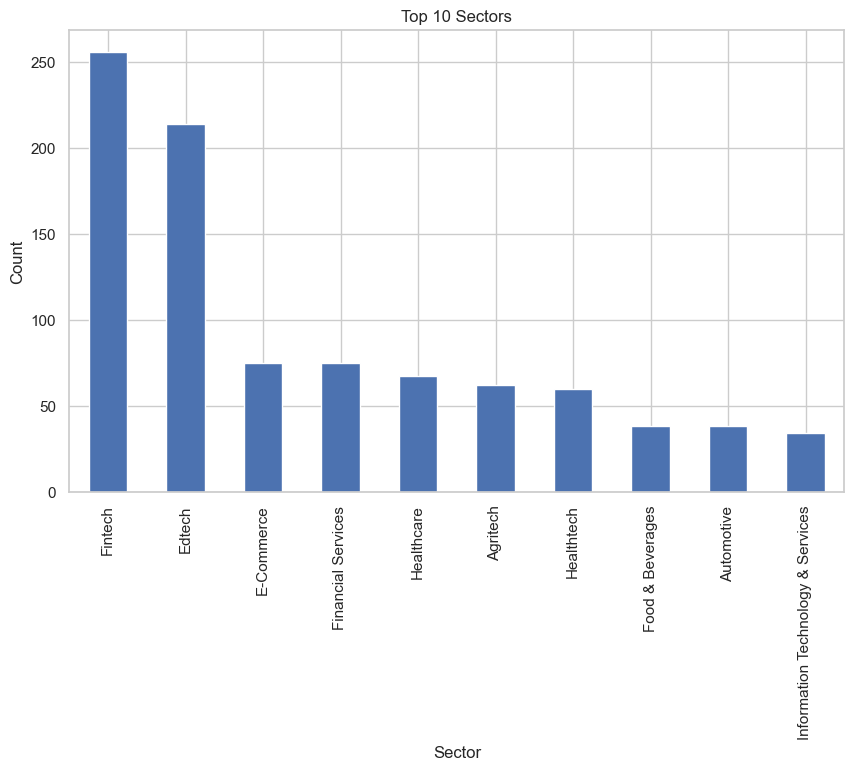

In [35]:
plt.figure(figsize=(10, 6))
merged_data['Sector'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

**Line Graph to Explore Relationships**

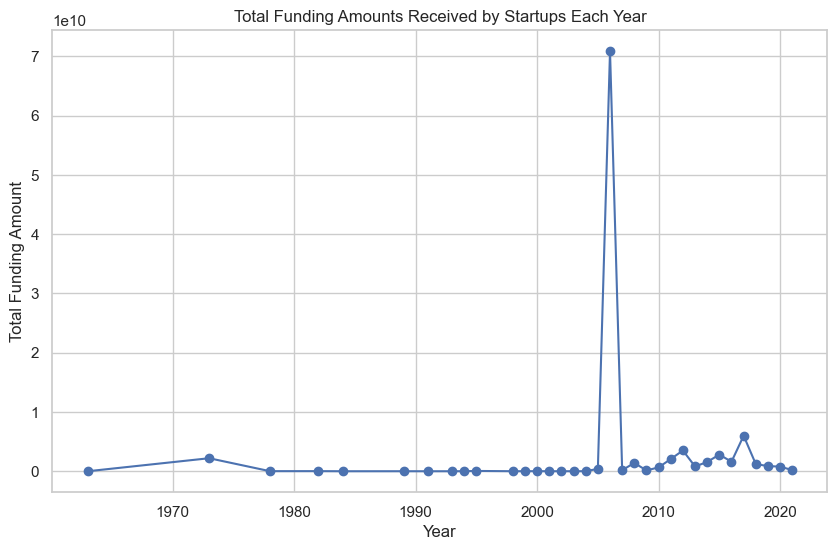

In [36]:

# Extract relevant columns
funding_data = merged_data[['Founded', 'Amount']]

# Group by year and calculate total funding amounts
yearly_funding = funding_data.groupby('Founded').sum().reset_index()

# Plotting the yearly trend of total funding amounts
plt.figure(figsize=(10, 6))
plt.plot(yearly_funding['Founded'], yearly_funding['Amount'], marker='o')
plt.title('Total Funding Amounts Received by Startups Each Year')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.grid(True)
plt.show()



In [37]:
#Sort the data by 'Amount' in descending order
sorted_data = merged_data.sort_values(by='Amount', ascending=False)

# 3. Select the top 10 entries with the highest funding amounts
top_10_funding = sorted_data.head(10)

# 4. Group the top 10 by 'Sector' and count the number of occurrences in each sector
sector_distribution = top_10_funding['Sector'].value_counts()

# Display the results
print("Top 10 funding amounts received by startups:")
print(top_10_funding[['Company_Brand', 'Sector', 'Amount']])

print("\nSector distribution in the top 10 funding amounts:")
print(sector_distribution)

Top 10 funding amounts received by startups:
                     Company_Brand                              Sector        Amount
280   reliance retail ventures ltd                              Retail  7.000000e+10
317                      snowflake                        Tech Company  3.000000e+09
328                       reliance  Multinational Conglomerate Company  2.200000e+09
302       reliance retail ventures                          E-Commerce  8.000000e+08
50                         phonepe                             Fintech  7.000000e+08
15                          zomato                       Food Delivery  6.600000e+08
326                         byju’s                              Edtech  5.000000e+08
303                       zhangmen                              Edtech  4.000000e+08
45                           ayana                    Renewable Player  3.900000e+08
2758           clp india pvt. ltd.           Energy, Natural Resources  3.650000e+08

Sector distribution

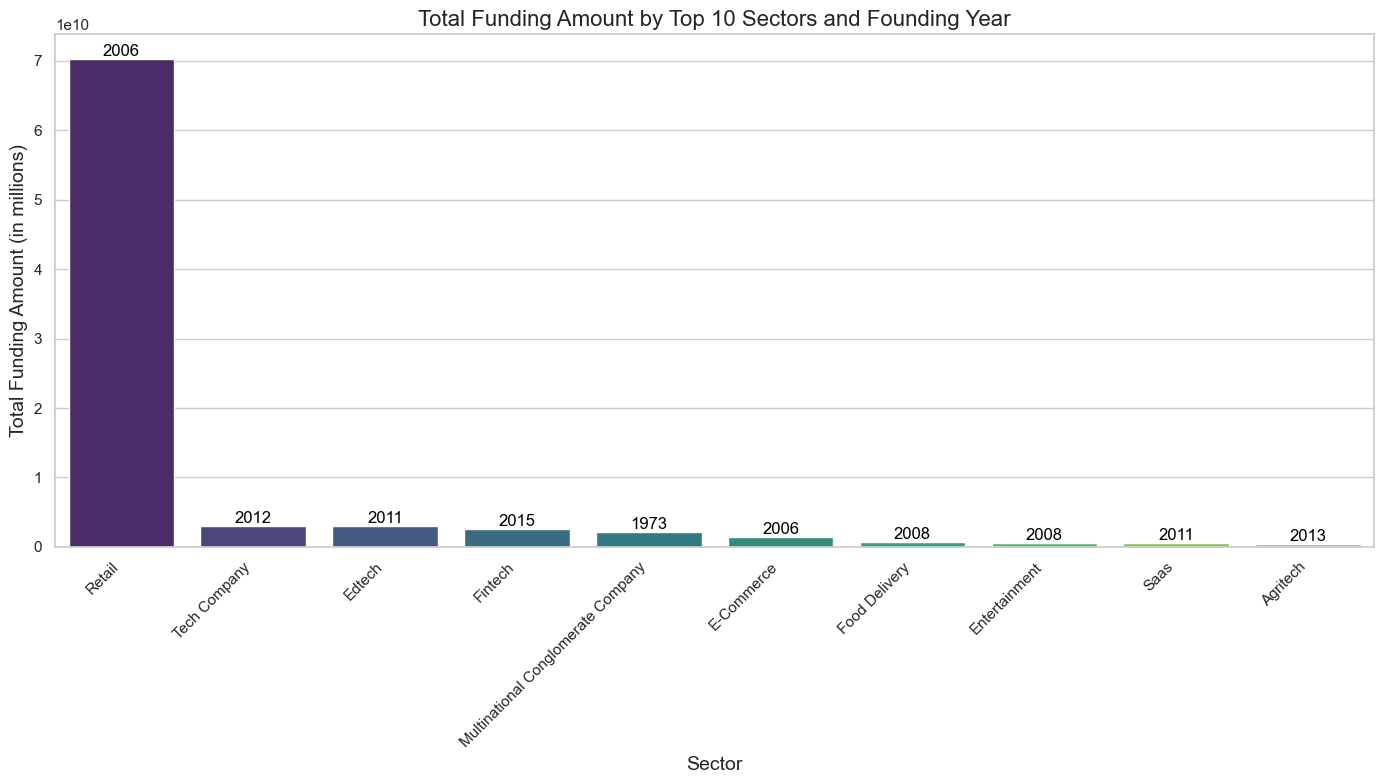

In [38]:
# 1. Aggregate the funding amounts by sector and sort to get the top 10 sectors
sector_funding = merged_data.groupby('Sector')['Amount'].sum().sort_values(ascending=False).head(10)
top_10_sectors = sector_funding.index

# 2. Filter the dataset for the top 10 sectors
top_sectors_data = merged_data[merged_data['Sector'].isin(top_10_sectors)]

# 3. Get the highest funding amounts and corresponding founding years for each sector
highest_funding_per_sector = top_sectors_data.loc[top_sectors_data.groupby('Sector')['Amount'].idxmax()]

# 4. Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x=sector_funding.index, y=sector_funding.values, palette="viridis")

# Annotate the bars with the founding years
for i, sector in enumerate(sector_funding.index):
    year = highest_funding_per_sector.loc[highest_funding_per_sector['Sector'] == sector, 'Founded'].values[0]
    plt.text(i, sector_funding.values[i], f'{year}', ha='center', va='bottom', fontsize=12, color='black')

# Customizing the plot
plt.title('Total Funding Amount by Top 10 Sectors and Founding Year', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

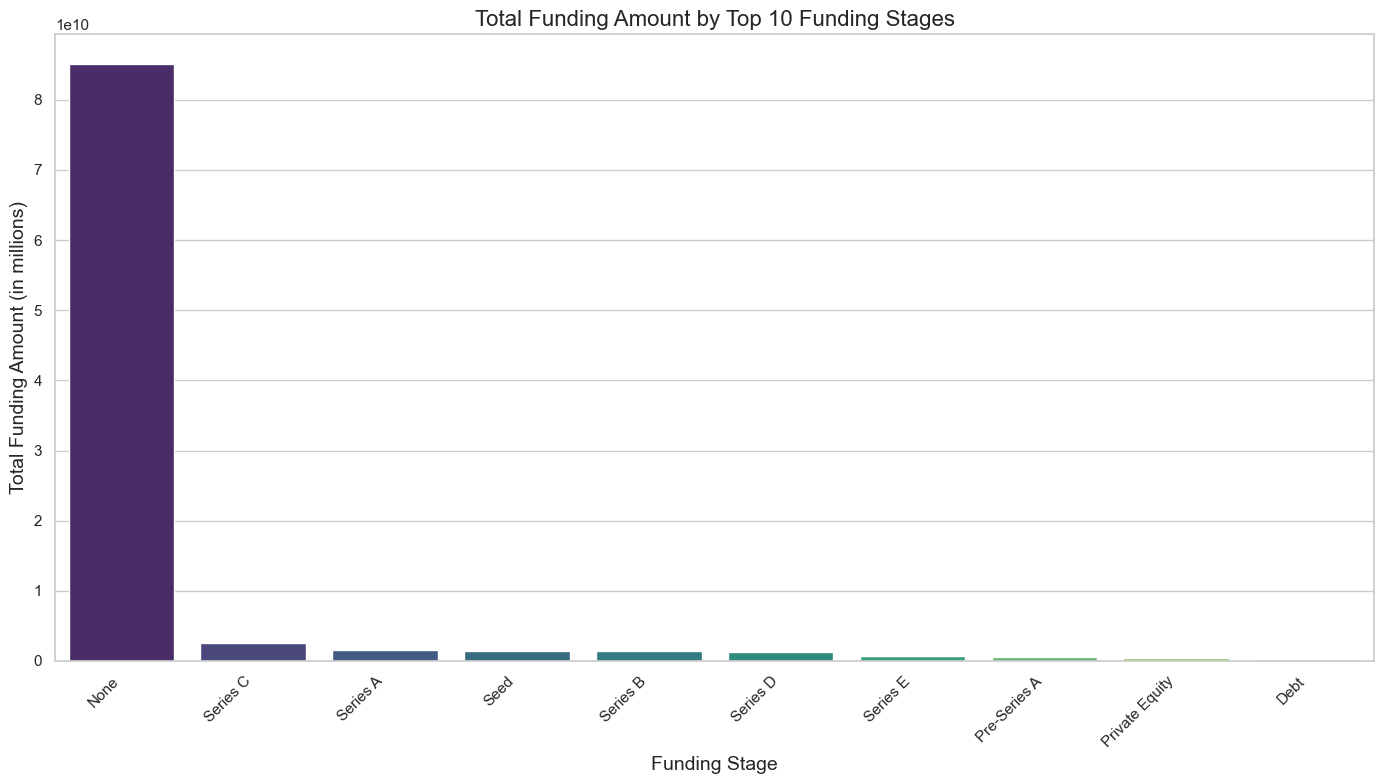

In [39]:
# 2. Aggregate the funding amounts by stage and sort to get the top 10 stages
stage_funding = merged_data.groupby('Stage')['Amount'].sum().sort_values(ascending=False).head(10)

# 3. Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x=stage_funding.index, y=stage_funding.values, palette="viridis")

# Customizing the plot
plt.title('Total Funding Amount by Top 10 Funding Stages', fontsize=16)
plt.xlabel('Funding Stage', fontsize=14)
plt.ylabel('Total Funding Amount (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

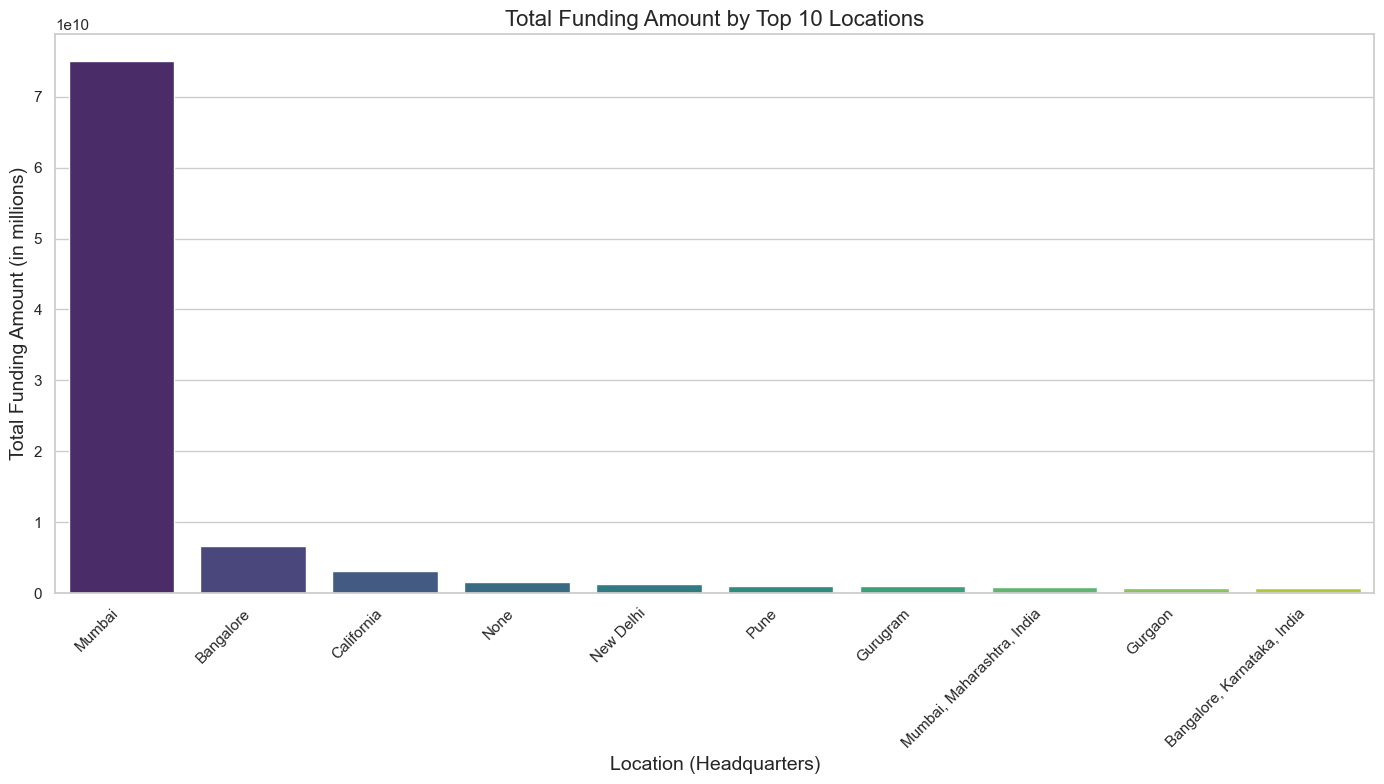

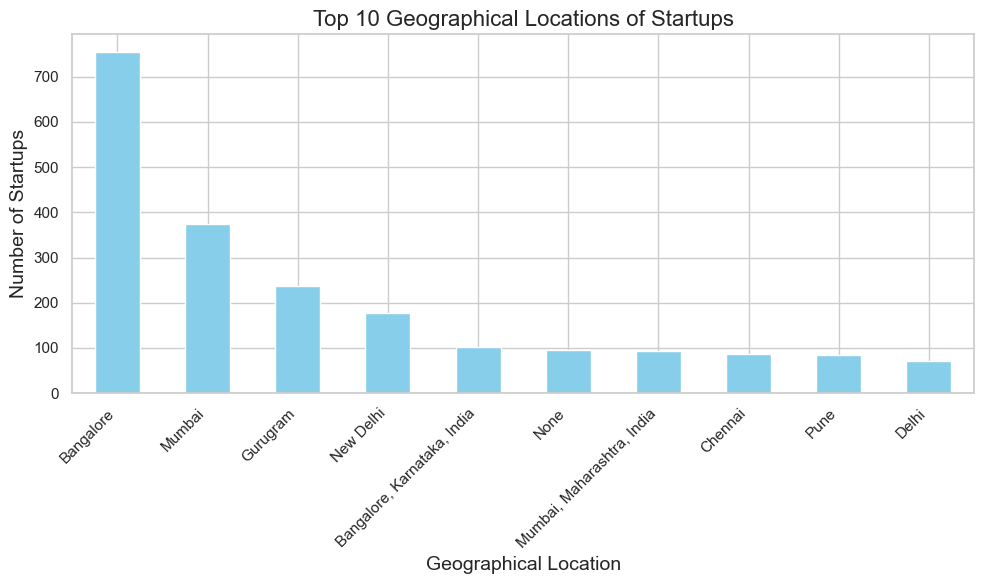

In [40]:
# 2. Aggregate the funding amounts by location and sort to get the top 10 locations
location_funding = merged_data.groupby('HeadQuarter')['Amount'].sum().sort_values(ascending=False).head(10)

# 3. Plot the data for funding amounts by location
plt.figure(figsize=(14, 8))
sns.barplot(x=location_funding.index, y=location_funding.values, palette="viridis")

# Customizing the plot
plt.title('Total Funding Amount by Top 10 Locations', fontsize=16)
plt.xlabel('Location (Headquarters)', fontsize=14)
plt.ylabel('Total Funding Amount (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# 4. Aggregate the data by geographical location and get the top 10 locations by startup count
geographical_location = merged_data['HeadQuarter'].value_counts().head(10)

# 5. Plot the data for geographical distribution of startups
plt.figure(figsize=(10, 6))
geographical_location.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Top 10 Geographical Locations of Startups', fontsize=16)
plt.xlabel('Geographical Location', fontsize=14)
plt.ylabel('Number of Startups', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

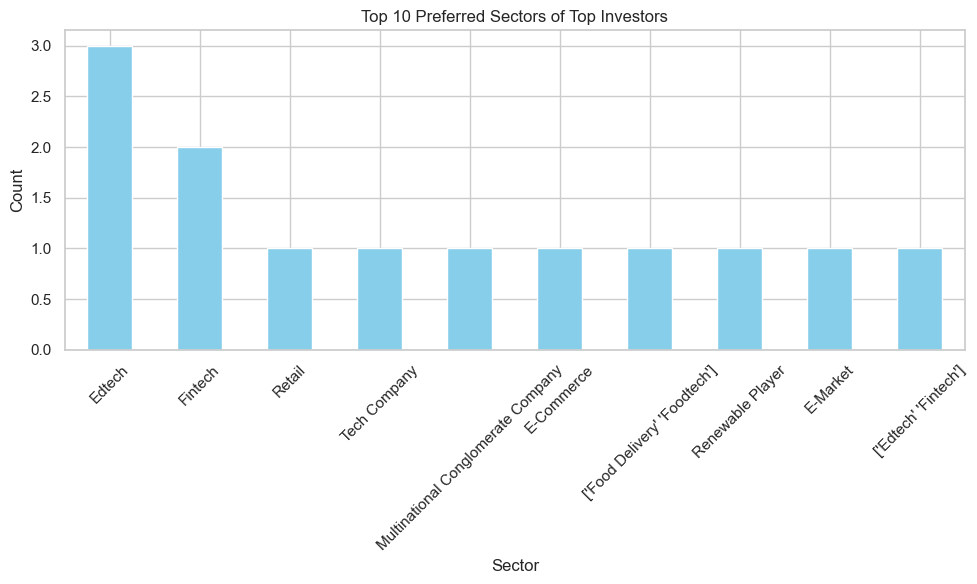

In [47]:
# 1. Aggregate and Summarize Data
investor_summary = merged_data.groupby('Investor').agg({
    'Amount': 'sum',                  # Total investment amount by each investor
    'Sector': lambda x: x.mode(),     # Most frequent sector invested in by each investor
    'Stage': lambda x: x.mode()       # Most frequent funding stage invested in by each investor
})

# 2. Identify Top Investors
top_investors = investor_summary.nlargest(14, 'Amount')

# Filter out entries with "-" or "—"
top_investors = top_investors[~top_investors['Sector'].isin(['-', '—'])]

# Convert arrays to strings in 'Sector' column
top_investors['Sector'] = top_investors['Sector'].astype(str)

# Extract preferred sectors and funding stages
preferred_sectors = top_investors['Sector'].value_counts().nlargest(14)

# Plot Preferred Sectors
plt.figure(figsize=(10, 6))
preferred_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Preferred Sectors of Top Investors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# 1. Aggregate and Summarize Data
investor_summary = merged_data.groupby('Investor').agg({
    'Amount': 'sum',                  # Total investment amount by each investor
    'Sector': lambda x: x.mode(),     # Most frequent sector invested in by each investor
    'Stage': lambda x: x.mode()       # Most frequent funding stage invested in by each investor
})

# 2. Identify Top Investors
top_investors = investor_summary.nlargest(10, 'Amount')

# 3. Analyze Preferred Sectors of Top Investors
preferred_sectors = top_investors['Sector']

# 4. Analyze Preferred Funding Stages of Top Investors
preferred_stages = top_investors['Stage']

# Display results
print("Top 10 Investors:")
print(top_investors)

print("\nPreferred Sectors of Top Investors:")
print(preferred_sectors)

print("\nPreferred Funding Stages of Top Investors:")
print(preferred_stages)

Top 10 Investors:
                                                       Amount                              Sector Stage
Investor                                                                                               
Silver Lake, Mubadala Investment Company         7.000000e+10                              Retail  None
Nan                                              3.117292e+09                                   —  Seed
Salesforce Ventures, Dragoneer Investment Group  3.000000e+09                        Tech Company  None
Facebook, Google, Kkr, Silver Lake               2.200000e+09  Multinational Conglomerate Company  None
General Atlantic, Kohlberg Kravis Roberts        8.000000e+08                          E-Commerce  None
Kora, Tiger Global Management                    7.120000e+08           [Food Delivery, Foodtech]  None
Flipkart                                         7.000000e+08                             Fintech  None
Owl Ventures, Tiger Global Management         

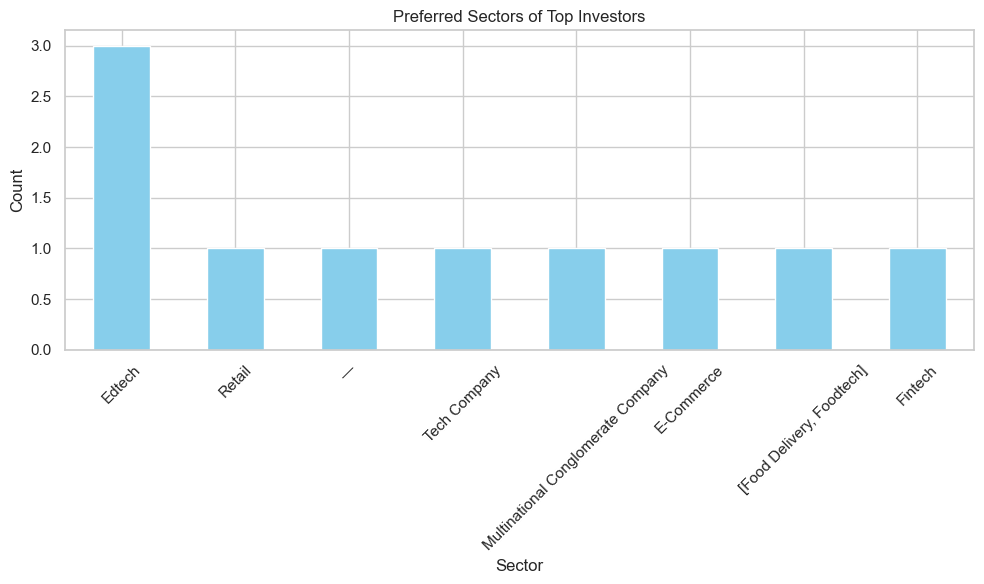

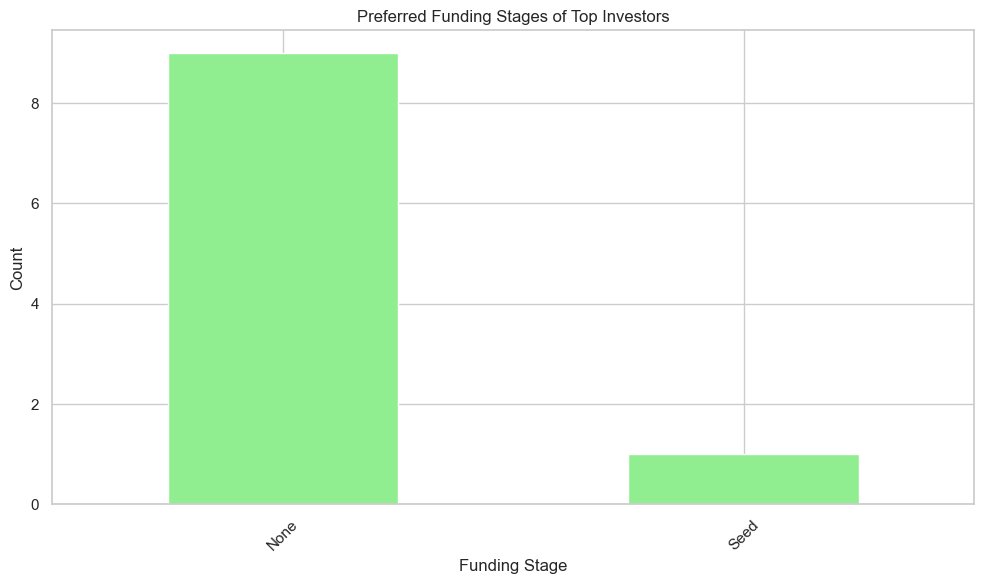

In [43]:
# Plot Preferred Sectors
plt.figure(figsize=(10, 6))
preferred_sectors.value_counts().plot(kind='bar', color='skyblue')
plt.title('Preferred Sectors of Top Investors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Preferred Funding Stages
plt.figure(figsize=(10, 6))
preferred_stages.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Preferred Funding Stages of Top Investors')
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Correlation Matrix**

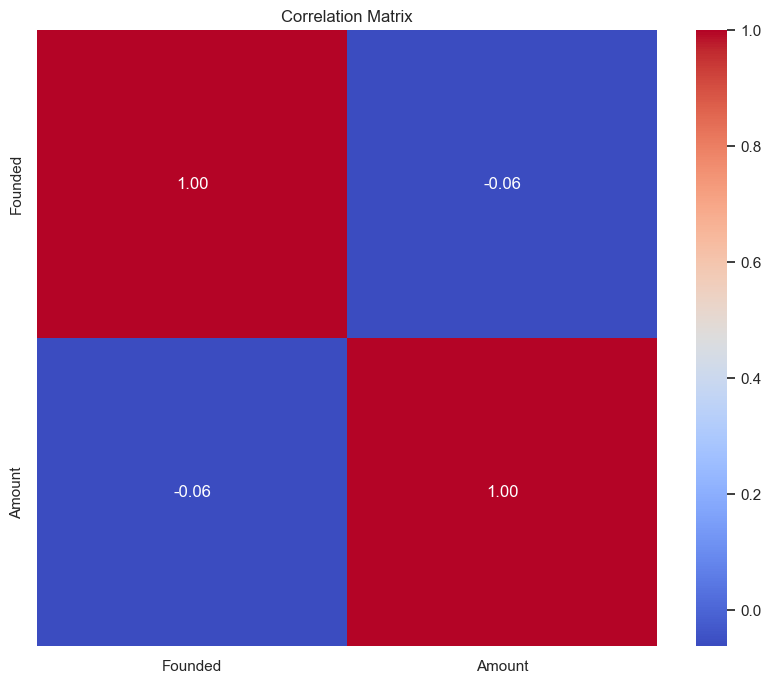

In [44]:

numeric_data = merged_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Outlier Detection**

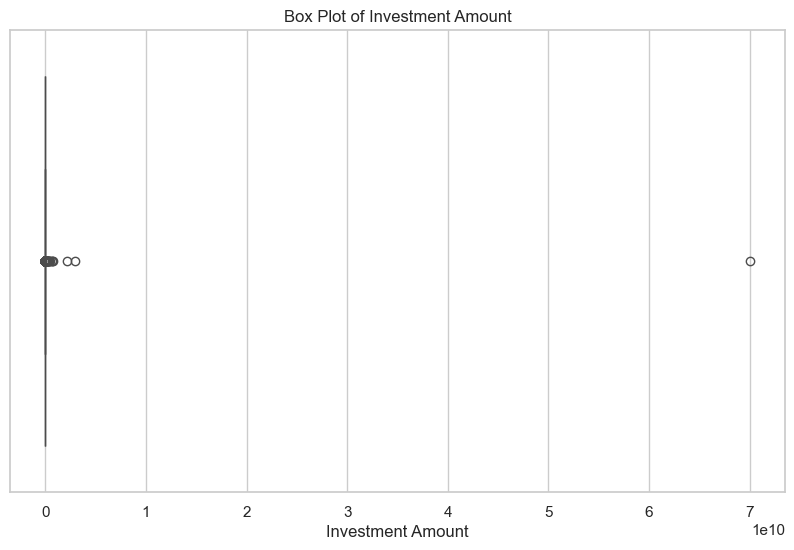

In [45]:
# Box plot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Amount')
plt.title('Box Plot of Investment Amount')
plt.xlabel('Investment Amount')
plt.show()


**Unique Values**

In [47]:
# Number of unique values for each column
unique_values = merged_data.nunique()
unique_values

# Specific unique values for categorical columns
unique_company_brands = merged_data['Company_Brand'].unique()
unique_headquarters = merged_data['HeadQuarter'].unique()
unique_sectors = merged_data['Sector'].unique()
unique_what_it_does = merged_data['What_it_does'].unique()
unique_founders = merged_data['Founders'].unique()
unique_investors = merged_data['Investor'].unique()
unique_stages = merged_data['Stage'].unique()

# Display counts of unique values
print(f"Unique Company Brands: {len(unique_company_brands)}")
print(f"Unique Headquarters: {len(unique_headquarters)}")
print(f"Unique Sectors: {len(unique_sectors)}")
print(f"Unique What it Does: {len(unique_what_it_does)}")
print(f"Unique Founders: {len(unique_founders)}")
print(f"Unique Investors: {len(unique_investors)}")
print(f"Unique Stages: {len(unique_stages)}")


Unique Company Brands: 2152
Unique Headquarters: 173
Unique Sectors: 837
Unique What it Does: 2690
Unique Founders: 1980
Unique Investors: 1759
Unique Stages: 71


In [52]:
threshold = 1  # Adjust this threshold based on your actual data for demonstration

# Print the DataFrame before modifications
print("DataFrame before modification:\n", merged_data)

# Apply the threshold method
for column in ['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage']:
    value_counts = merged_data[column].value_counts()
    to_replace = value_counts[value_counts <= threshold].index
    merged_data[column] = merged_data[column].replace(to_replace, 'Other')

# Print the DataFrame after modifications
print("\nDataFrame after modification:\n", merged_data)

DataFrame before modification:
      Company_Brand  Founded HeadQuarter       Sector What_it_does Founders         Investor     Amount     Stage
0            Other     2019     Chennai     Agritech        Other    Other  Angel Investors   200000.0      None
1            Other     2019   Bangalore       Edtech        Other    Other            Other   100000.0  Pre-Seed
2            Other     2018        Pune        Other        Other    Other            Other  2800000.0  Pre-Seed
3            Other     2020   New Delhi        Other        Other    Other            Other   400000.0      None
4            Other     2016       Other     Agritech        Other    Other            Other   340000.0      None
...            ...      ...         ...          ...          ...      ...              ...        ...       ...
2874         Other     2017      Mumbai        Other        Other    Other            Other  2800000.0  Series A
2875         Other     2013    Gurugram  Hospitality        Othe

**Further Cleaning of Datasets after EDA**

**Normalize the "HeadQuarter" Column**

In [40]:
# Define a function to extract city names
def extract_city(location):
    if pd.isna(location):
        return location
    return location.split(',')[0].strip()

# Apply the function to the 'HeadQuarter' column
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].apply(extract_city)

# # Verify the changes
# unique_headquarters = merged_data['HeadQuarter'].unique()
# print(f"Unique Headquarters after normalization: {unique_headquarters}")

**Replot the ""Top 10 Headquarters""**

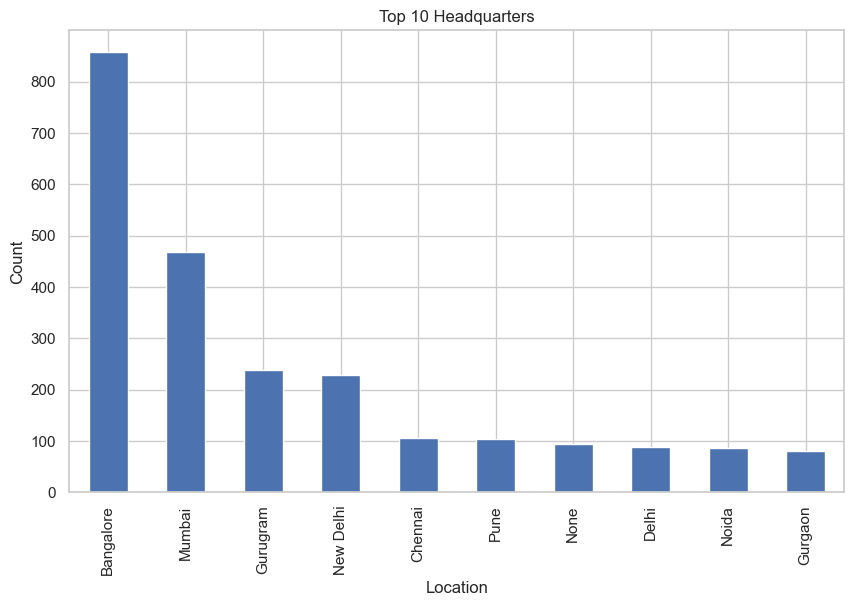

In [41]:
plt.figure(figsize=(10, 6))
merged_data['HeadQuarter'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Headquarters')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [42]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = merged_data['Amount'].quantile(0.25)
Q3 = merged_data['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = merged_data[(merged_data['Amount'] < (Q1 - 1.5 * IQR)) | (merged_data['Amount'] > (Q3 + 1.5 * IQR))]
# print(f"Outliers in 'Amount':\n{outliers}")

print(f"Outliers in 'Amount':")
outliers



Outliers in 'Amount':


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019,Chennai,Agritech,Cultivating Ideas For Profit,"Prasanna Manogaran, Bharani C L",Angel Investors,200000.0,None
1,krayonnz,2019,Bangalore,Edtech,An Academy-Guardian-Scholar Centric Ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",Gsf Accelerator,100000.0,Pre-Seed
3,ncome,2020,New Delhi,Escrow,Escrow-As-A-Service Platform,Ritesh Tiwari,"Venture Catalysts, Pointone Capital",400000.0,None
4,gramophone,2016,Indore,Agritech,Gramophone Is An Agtech Platform Enabling Acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None
5,qzense,2019,Bangalore,Agritech,Qzense Labs Is Building The Next-Generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
...,...,...,...,...,...,...,...,...,...
2783,dailyhunt,2017,Bangalore,"Information Technology, Mobile, News, Operatin...",Newshunt Is A Bangalore Based Ebooks Company.,Nan,Nan,6000000.0,Series E
2784,slicepay,2017,Bengaluru,"Fintech, Internet, Payments, Service Industry",Slicepay Is An Ai Based Instant Credit App For...,Nan,Nan,14900000.0,Series A
2785,udaan,2017,Bangalore,"B2B, Business Development, Internet, Marketplace","Udaan Is A B2B Trade Platform, Designed Specif...",Nan,Nan,225000000.0,Series C
2787,mombay,2017,Mumbai,"Food And Beverage, Food Delivery, Internet",Mombay Is A Unique Opportunity For Housewives ...,Nan,Nan,7500.0,Seed


**Outliers in amount will be handled by capping them. This will limit their influence on the overall analysis without removing valuable data.**

In [43]:
# # Cap the outliers
# # Define the caps
# lower_cap = Q1 - 1.5 * IQR
# upper_cap = Q3 + 1.5 * IQR

# # Cap the 'Amount' column
# merged_data['Amount_capped'] = merged_data['Amount'].clip(lower=lower_cap, upper=upper_cap)

# # Visualize the data after handling outliers
# plt.figure(figsize=(10, 6))
# plt.boxplot(merged_data['Amount_capped'], vert=False)
# plt.title('Box Plot of Investment Amount (After Handling Outliers)')
# plt.xlabel('Investment Amount')
# plt.grid(True)
# plt.show()


In [44]:
merged_data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 2853 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2853 non-null   object 
 1   Founded        2853 non-null   int32  
 2   HeadQuarter    2853 non-null   object 
 3   Sector         2853 non-null   object 
 4   What_it_does   2853 non-null   object 
 5   Founders       2853 non-null   object 
 6   Investor       2853 non-null   object 
 7   Amount         2853 non-null   float64
 8   Stage          2853 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 211.7+ KB


In [45]:
print(merged_data)

        Company_Brand  Founded HeadQuarter                   Sector                                       What_it_does                                           Founders                                           Investor     Amount     Stage
0          aqgromalin     2019     Chennai                 Agritech                       Cultivating Ideas For Profit                    Prasanna Manogaran, Bharani C L                                    Angel Investors   200000.0      None
1            krayonnz     2019   Bangalore                   Edtech  An Academy-Guardian-Scholar Centric Ecosystem ...                   Saurabh Dixit, Gurudutt Upadhyay                                    Gsf Accelerator   100000.0  Pre-Seed
2        padcare labs     2018        Pune       Hygiene Management   Converting Bio-Hazardous Waste To Harmless Waste                                    Ajinkya Dhariya                                     Venture Center  2800000.0  Pre-Seed
3               ncome     2020  

In [78]:
# Example mappings for funding stages
stage_mapping = {
    None: 0,           # Mapping None values to 0 or any other appropriate value
    'Pre-Seed': 1,
    'Seed': 2,
    'Pre-Series A': 3,
    'Series A': 4,
    'Series B': 5,
    'Series C': 6,
    'Series D': 7,
    'Series E': 8,
    'Series F': 9,
    'IPO': 10
}

merged_data['Stage_Ordinal'] = merged_data['Stage'].map(stage_mapping)

# Define market expansion as the number of unique sectors for each company brand
market_expansion = merged_data.groupby('Company_Brand')['Sector'].nunique().reset_index()
market_expansion.columns = ['Company_Brand', 'Unique_Sectors']

# Reset the index of market_expansion
market_expansion.reset_index(drop=True, inplace=True)

# Merge the market expansion data back into the original DataFrame
merged_data = pd.merge(merged_data, market_expansion, left_on='Company_Brand', right_on='Company_Brand')

# Display the DataFrame with proxies
print("\nDataFrame with Success Metric Proxies:\n", merged_data)



# Calculate correlations
correlation_matrix = merged_data[['Amount', 'Stage_Ordinal', 'Unique_Sectors']].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)


DataFrame with Success Metric Proxies:
         Company_Brand  Founded HeadQuarter                   Sector                                       What_it_does                                           Founders                                           Investor     Amount     Stage  Stage_Ordinal  Unique_Sectors_x  Unique_Sectors_y  Unique_Sectors_original  Unique_Sectors_expansion  Unique_Sectors
0          aqgromalin     2019     Chennai                 Agritech                       Cultivating Ideas For Profit                    Prasanna Manogaran, Bharani C L                                    Angel Investors   200000.0      None            NaN                 1                 1                        1                         1               1
1            krayonnz     2019   Bangalore                   Edtech  An Academy-Guardian-Scholar Centric Ecosystem ...                   Saurabh Dixit, Gurudutt Upadhyay                                    Gsf Accelerator   100000.0  Pre-Se

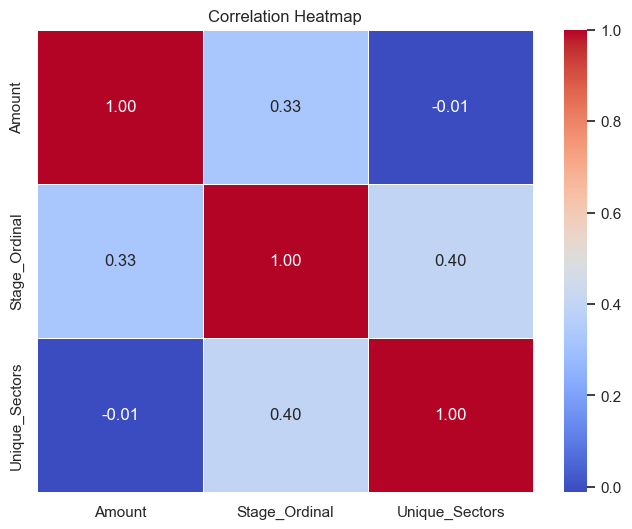

In [79]:
 # Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be encoded
categorical_columns = ['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate over each column and encode its values
for column in categorical_columns:
    merged_data[column] = label_encoder.fit_transform(merged_data[column])

# Display the updated data types
print("Data types of each column after label encoding:\n", merged_data.dtypes)


In [80]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be encoded
categorical_columns = ['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate over each column and encode its values
for column in categorical_columns:
    merged_data[column] = label_encoder.fit_transform(merged_data[column])

# Display the updated data types
print("Data types of each column after label encoding:\n", merged_data.dtypes)


Data types of each column after label encoding:
 Company_Brand                 int32
Founded                       int32
HeadQuarter                   int32
Sector                        int32
What_it_does                  int32
Founders                      int32
Investor                      int32
Amount                      float64
Stage                         int32
Stage_Ordinal               float64
Unique_Sectors_x              int64
Unique_Sectors_y              int64
Unique_Sectors_original       int64
Unique_Sectors_expansion      int64
Unique_Sectors                int64
dtype: object


In [87]:
from scipy.stats import f_oneway

# Assuming 'merged_data' contains your dataset after converting categorical columns to numeric

# Define the columns to be tested
numeric_columns = ['Founded','Amount']

# Perform ANOVA for each numeric column
for column in numeric_columns:
    # Group the data by each categorical column and select the column for the ANOVA test
    grouped_data = merged_data.groupby('Sector')[column].apply(list)
    
    # Perform ANOVA test
    statistic, p_value = f_oneway(*grouped_data)
    
    # Print the result
    print(f"ANOVA test for column '{column}':")
    print(f"  F-statistic: {statistic}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  The null hypothesis is rejected (significant result)")
    else:
        print("  The null hypothesis cannot be rejected (non-significant result)")
    print()


ANOVA test for column 'Founded':
  F-statistic: 0.666823409796752
  p-value: 0.9999999999925746
  The null hypothesis cannot be rejected (non-significant result)

ANOVA test for column 'Amount':
  F-statistic: 0.09880155936630566
  p-value: 0.9999999999999999
  The null hypothesis cannot be rejected (non-significant result)



In [86]:
# Define the columns to be tested
numeric_columns = ['Founded','Amount']

# Perform ANOVA for each numeric column
for column in numeric_columns:
    # Group the data by each categorical column and select the column for the ANOVA test
    grouped_data = merged_data.groupby('HeadQuarter')[column].apply(list)
    
    # Perform ANOVA test
    statistic, p_value = f_oneway(*grouped_data)
    
    # Print the result
    print(f"ANOVA test for column '{column}':")
    print(f"  F-statistic: {statistic}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  The null hypothesis is rejected (significant result)")
    else:
        print("  The null hypothesis cannot be rejected (non-significant result)")
    print()


ANOVA test for column 'Founded':
  F-statistic: 1.2477151823599417
  p-value: 0.018426031186528045
  The null hypothesis is rejected (significant result)

ANOVA test for column 'Amount':
  F-statistic: 0.044732708633360145
  p-value: 0.9999999999999999
  The null hypothesis cannot be rejected (non-significant result)



In [88]:
numeric_columns = ['Founded','Amount']

# Perform ANOVA for each numeric column
for column in numeric_columns:
    # Group the data by each categorical column and select the column for the ANOVA test
    grouped_data = merged_data.groupby('Stage')[column].apply(list)
    
    # Perform ANOVA test
    statistic, p_value = f_oneway(*grouped_data)
    
    # Print the result
    print(f"ANOVA test for column '{column}':")
    print(f"  F-statistic: {statistic}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  The null hypothesis is rejected (significant result)")
    else:
        print("  The null hypothesis cannot be rejected (non-significant result)")
    print()

ANOVA test for column 'Founded':
  F-statistic: 5.500380157523232
  p-value: 1.7770687280371494e-41
  The null hypothesis is rejected (significant result)

ANOVA test for column 'Amount':
  F-statistic: 0.04114131534202197
  p-value: 0.9999999999999999
  The null hypothesis cannot be rejected (non-significant result)

